In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [2]:
# Load dataset
df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hello\AppData\Local\Temp\ipykernel_22168\3804657477.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')


In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
# Aggregate metrics per customer ID (MSISDN)
df['total_traffic'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
user_metrics = df.groupby('MSISDN/Number').agg(
    session_frequency=('MSISDN/Number', 'count'),
    session_duration=('Dur. (ms).1', 'sum'),
    total_traffic=('total_traffic', 'sum')
).reset_index()

In [7]:
# Report top 10 customers per engagement metric
top_10_frequency = user_metrics.nlargest(10, 'session_frequency')
top_10_duration = user_metrics.nlargest(10, 'session_duration')
top_10_traffic = user_metrics.nlargest(10, 'total_traffic')

In [8]:
# Print top 10 users
print("Top 10 users by session frequency:")
print(top_10_frequency)
print("Top 10 users by session duration:")
print(top_10_duration)
print("Top 10 users by total traffic:")
print(top_10_traffic)

Top 10 users by session frequency:
       MSISDN/Number  session_frequency  session_duration  total_traffic
13526   3.362632e+10                 18      8.791937e+09   7.971167e+09
6437    3.361489e+10                 17      9.966906e+09   8.846226e+09
13180   3.362578e+10                 17      1.855376e+10   8.499621e+09
37052   3.365973e+10                 16      4.035436e+09   7.705863e+09
76363   3.367588e+10                 15      4.865954e+09   7.891111e+09
92923   3.376054e+10                 15      9.279442e+09   8.514774e+09
65118   3.366716e+10                 13      8.744922e+09   5.618394e+09
666     3.360313e+10                 12      6.287767e+09   4.976195e+09
1279    3.360452e+10                 12      5.207995e+09   5.487855e+09
13994   3.362708e+10                 12      4.703519e+09   5.754731e+09
Top 10 users by session duration:
       MSISDN/Number  session_frequency  session_duration  total_traffic
13180   3.362578e+10                 17      1.855376e+

# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [9]:
# Normalize engagement metrics
scaler = MinMaxScaler()
user_metrics[['session_frequency', 'session_duration', 'total_traffic']] = scaler.fit_transform(
    user_metrics[['session_frequency', 'session_duration', 'total_traffic']])


In [10]:
# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
user_metrics['cluster'] = kmeans.fit_predict(user_metrics[['session_frequency', 'session_duration', 'total_traffic']])


In [12]:
# Print cluster assignments
print("Cluster assignments:")
print(user_metrics[['MSISDN/Number', 'cluster']].head())

Cluster assignments:
   MSISDN/Number  cluster
0   3.360100e+10        2
1   3.360100e+10        2
2   3.360100e+10        2
3   3.360101e+10        2
4   3.360101e+10        0


# Compute the minimum, maximum, average & total non-normalized metrics for each cluster:

In [13]:
# Compute min, max, avg, and total for each cluster (using non-normalized metrics)
original_user_metrics = df.groupby('MSISDN/Number').agg(
    session_frequency=('MSISDN/Number', 'count'),
    session_duration=('Dur. (ms).1', 'sum'),
    total_traffic=('total_traffic', 'sum')
).reset_index()

In [14]:
original_user_metrics['cluster'] = user_metrics['cluster']

In [15]:
cluster_summary = original_user_metrics.groupby('cluster').agg(
    min_session_frequency=('session_frequency', 'min'),
    max_session_frequency=('session_frequency', 'max'),
    avg_session_frequency=('session_frequency', 'mean'),
    total_session_frequency=('session_frequency', 'sum'),
    min_session_duration=('session_duration', 'min'),
    max_session_duration=('session_duration', 'max'),
    avg_session_duration=('session_duration', 'mean'),
    total_session_duration=('session_duration', 'sum'),
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

In [16]:
# Print cluster summary
print("Cluster summary:")
print(cluster_summary)

Cluster summary:
   cluster  min_session_frequency  max_session_frequency  \
0        0                      2                      4   
1        1                      3                     18   
2        2                      1                      2   

   avg_session_frequency  total_session_frequency  min_session_duration  \
0               2.176052                    47068            18235797.0   
1               4.248279                    17282            46899075.0   
2               1.042226                    84585             7142988.0   

   max_session_duration  avg_session_duration  total_session_duration  \
0          3.174825e+09          2.136017e+08            4.620205e+12   
1          1.855376e+10          5.693325e+08            2.316045e+12   
2          1.573421e+09          1.069848e+08            8.682669e+12   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0       2.842182e+08       1.873330e+09       1.125421e+09   
1       1.085994e+09    

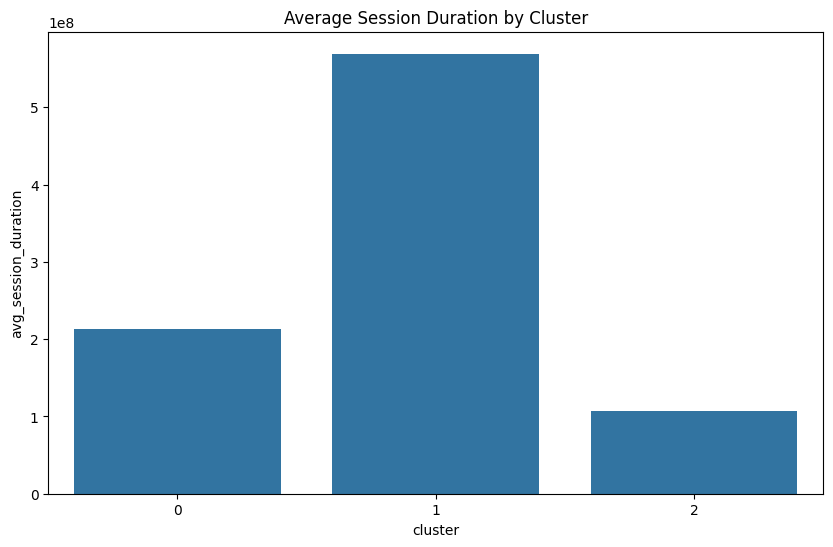

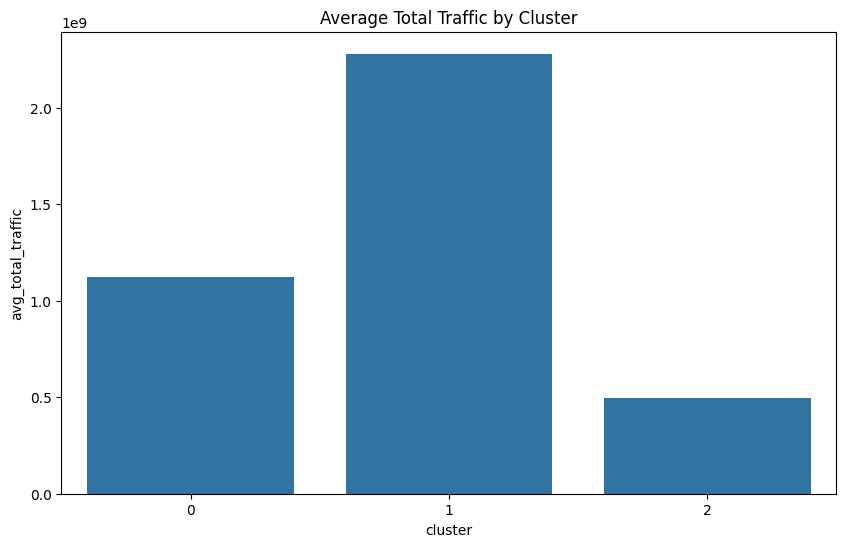

In [19]:
# Visualize cluster engagement
plt.figure(figsize=(10,6))
sns.barplot(x='cluster', y='avg_session_duration', data=cluster_summary)
plt.title('Average Session Duration by Cluster')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='cluster', y='avg_total_traffic', data=cluster_summary)
plt.title('Average Total Traffic by Cluster')
plt.show()

# Aggregate total traffic per application and derive top 10 most engaged users per app:

In [20]:
df['Social Media data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [32]:
# Aggregate total traffic per application per user

# List of the application variables 
applications = ['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']


app_traffic = df.groupby(['MSISDN/Number', 'Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']).agg(
    total_app_traffic=('total_traffic', 'sum')
).reset_index()

In [30]:
# Derive top 10 most engaged users per application
top_10_per_app = app_traffic.groupby('Social Media data', group_keys=False).apply(
    lambda x: x.nlargest(10, columns='total_app_traffic')).reset_index(drop=True)


C:\Users\Hello\AppData\Local\Temp\ipykernel_22168\4241504595.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_per_app = app_traffic.groupby('Social Media data', group_keys=False).apply(


In [31]:
# Print top 10 users per application
print("Top 10 users per application:")
print(top_10_per_app)

Top 10 users per application:
        MSISDN/Number  Social Media data  total_app_traffic
0        3.366119e+10             1563.0        424126106.0
1        3.366287e+10             1753.0        622175722.0
2        3.365984e+10             2003.0        362208330.0
3        3.366298e+10             2050.0        641433912.0
4        3.366430e+10             3111.0        297296850.0
...               ...                ...                ...
148930   3.361008e+10          3648659.0        283278175.0
148931   3.365856e+10          3648729.0        811819225.0
148932   3.365205e+10          3648814.0        155655066.0
148933   3.375024e+10          3650240.0        537130735.0
148934   3.366178e+10          3650861.0        202861272.0

[148935 rows x 3 columns]


In [34]:
# Derive top 10 most engaged users per application
top_10_per_app = app_traffic.groupby('Youtube data', group_keys=False).apply(
    lambda x: x.nlargest(10, columns='total_app_traffic')).reset_index(drop=True)


C:\Users\Hello\AppData\Local\Temp\ipykernel_22168\88014188.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_per_app = app_traffic.groupby('Youtube data', group_keys=False).apply(


In [35]:
# Print top 10 users per application
print("Top 10 users per application:")
print(top_10_per_app)

Top 10 users per application:
        MSISDN/Number  Social Media data  Google data  Email data  \
0        3.365817e+10          1022021.0    8866232.0   3498859.0   
1        3.366504e+10          1474913.0    5872860.0   4271192.0   
2        3.366949e+10          3302960.0   14303411.0   2604393.0   
3        3.364809e+10          3537729.0   12817131.0   2297960.0   
4        3.376848e+10          3077236.0   13260697.0   1878083.0   
...               ...                ...          ...         ...   
148930   3.367443e+10          2593593.0    8733894.0    791357.0   
148931   3.366319e+10           379769.0   10081501.0   2732906.0   
148932   3.366407e+10          1580721.0    5048494.0   3026032.0   
148933   3.366957e+10          2772152.0    6902988.0    808292.0   
148934   3.368757e+10          3357373.0    7074674.0    526202.0   

        Youtube data  Netflix data  Gaming data   Other data  \
0            78903.0    18791567.0  354747709.0  801070047.0   
1           1

# Plot top 3 most used applications

In [74]:
# List of the application variables 
applications = ['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']


#  Aggregate total traffic per application
app_usage = df.groupby(applications).agg(
    total_traffic=('total_traffic', 'sum')
).reset_index()

In [79]:
total_data_usage = df[applications].sum()

In [80]:
# Step 3: Sort the data to get the top 3 applications
top_3_apps = total_data_usage.nlargest(3)

C:\Users\Hello\AppData\Local\Temp\ipykernel_22168\701608110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette='coolwarm')


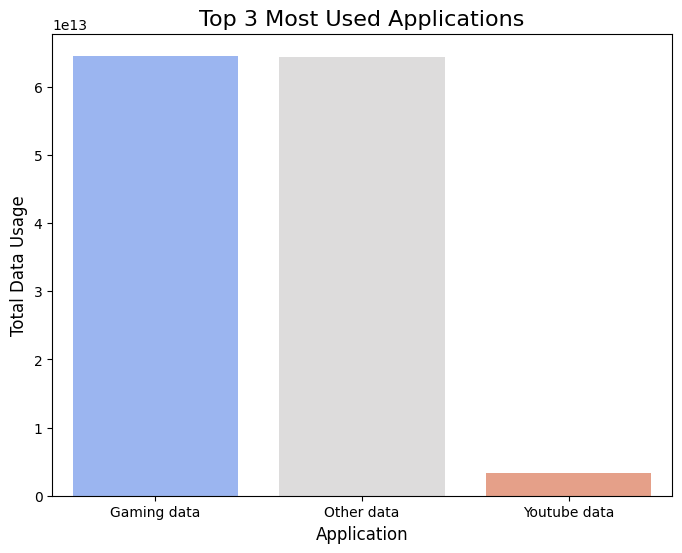

In [87]:
# Step 4: Plot the data using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette='coolwarm')

# Adding title and labels
plt.title('Top 3 Most Used Applications', fontsize=16)
plt.xlabel('Application', fontsize=12)
plt.ylabel('Total Data Usage', fontsize=12)

# Show the plot
plt.show()

# Using k-means clustering algorithm to group users based on engagement metrics & finding the optimal k using the elbow method:

In [67]:
# Elbow method to find optimal value of k
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_metrics[['session_frequency', 'session_duration', 'total_traffic']])
    inertia.append(kmeans.inertia_)

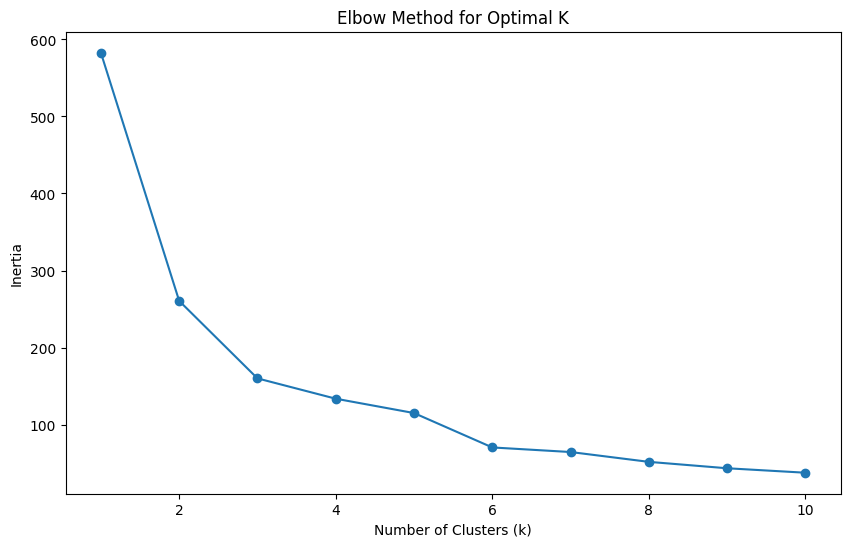

In [68]:
# Plot inertia to find optimal k
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Explanation of Steps:
- Aggregate metrics per customer: The data is grouped by MSISDN (customer ID), and for each customer, the session frequency, total session duration, and total traffic are calculated. We also report the top 10 customers for each metric.

- Normalize and Cluster: The engagement metrics are normalized, and k-means clustering is performed with k=3. Each customer is assigned to one of the 3 engagement clusters.

- Cluster Summary and Visualization: The min, max, average, and total values for each metric are computed for each cluster. These are visualized using bar plots to show the average engagement metrics per cluster.

- Aggregate per Application: The total traffic per application is computed, and the top 10 most engaged users for each application are listed.

- Top 3 Applications: The total traffic per application is computed, and the top 3 most used applications are visualized.

- Optimal K (Elbow Method): The elbow method is used to determine the optimal number of clusters (k) based on the inertia values for different k values. The plot helps visualize the "elbow" point, which is the best value for k.

# Interpretations:
- Top Customers: Insights into which customers are driving the most engagement, helping the business focus on these high-value users.
- K-Means Clustering: Helps segment users into different engagement levels, allowing for tailored resource allocation.
- Application Insights: Identifying the most engaged users and top apps provides actionable insights for technical teams to optimize app performance.